<a href="https://colab.research.google.com/github/wahyunh10/Project-Online-Retail-Dataset/blob/main/Online_Retail_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETAIL ONLINE DATASET (EDA + RFM Analysis)**

---



# **Introduction**

Let's Explore Retail Online Dataset and Summarize it using the final dashboard. This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# **Import Data**

---


Import the excel file as panda Data Frames and examine it.

In [2]:
#Import the excel file and examine it
df = pd.read_excel('Online Retail.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

# **Cleansing Dataset**

In [4]:
#Investigate missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#drop missing value
df = df.dropna()
df.shape

(406829, 8)

In [6]:
#Check the data type
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
#Cleaning String and data type
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace(r"\s+",' ', regex = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df['CustomerID'] = df['CustomerID'].astype('string')
df.dtypes

InvoiceNo              string
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             string
Country                object
dtype: object

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


This is strange if our dataset contains high negative values. If we look carefully, not all of our dataset contain transactions from selling products activities. Some of fees and costs are included in this dataset. This fees and cost are in StockCode that contain only letter or alphabet (including space) values.

In [11]:
#Cleaning Data Frame where StockCode contains space
df['string'] = df.StockCode.str.isalpha()
df = df[df['string'] != False]
df['space'] = df.StockCode.str.contains(' ')
df = df[df['space'] != False]
df = df.drop(columns=['string', 'space'])
df.shape

(371020, 8)

Next we have to filtering out canceled transaction. In the description of dataset, it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'C'.

In [12]:
#Filtering transaction with invoice number started with letter 'C'
df = df[~df.InvoiceNo.str.contains('C')]
df.shape

(363119, 8)

Next, it is time to remove duplicate data.

In [13]:
#Remove ruplicate data in EXACT columns
df.drop_duplicates(inplace = True)
df.shape

(358309, 8)

We move to the next step. In this step, we need to deal with Outlier data. Outlier is a data point in the dataset that differs significantly from the other data or observations. Many statistic procedures are affected by the presence of outliers. So, in this case, removing the outlier may be an option.

In this method, we use IQR (Inter Quartile Range). IQR approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [14]:
#Finding the IQR of UnitPrice
percentile25 = df['UnitPrice'].quantile(0.25)
percentile75 = df['UnitPrice'].quantile(0.75)
iqr = percentile75 - percentile25
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Removing Outlier from UnitPrice
new_df = df[(df['UnitPrice'] < upper_limit)  & (df['UnitPrice'] > lower_limit)]
print(df.shape)
print(new_df.shape)

(358309, 8)
(326249, 8)


In [15]:
#Finding the IQR of UnitPrice
percentile25 = new_df['Quantity'].quantile(0.25)
percentile75 = new_df['Quantity'].quantile(0.75)
iqr = percentile75 - percentile25
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Removing Outlier from UnitPrice
new_df = new_df[(new_df['Quantity'] < upper_limit)  & (new_df['Quantity'] > lower_limit)]
print(new_df.shape)

(303169, 8)


Next it is time to extract the to to make our analysis easier.

In [16]:
#Extract date from datetime column in Pandas
new_df['Date'] = new_df['InvoiceDate'].dt.normalize()
new_df['Year'] = new_df['InvoiceDate'].dt.year
new_df['Month'] = new_df['InvoiceDate'].dt.month_name().str[:3]
new_df['Day'] = new_df['InvoiceDate'].dt.day_name()
new_df['hour'] = new_df['InvoiceDate'].dt.hour
new_df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

Finally, for the last step, it's time to create columns Sales to know the total value for each transaction.

In [17]:
new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,hour,month_year,Sales
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,12.60


# **Exploratory Analysis**

Exploratory data analysis is a way to better understand our data which helps in further Data preprocessing. And data visualization is a key, making the exploratory data analysis process streamline and easily analyzing data using plots and charts.

# **Sales vs Quantity**
**Sales and Quantity Based on Country**

In [18]:
Sales_Country = new_df.groupby(['Country']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Sales', ascending=False)
print(Sales_Country.head(10))

                Total_Order       Sales  Quantity
Country                                          
United Kingdom       272708  3352647.62   1970315
Germany                6934   126673.74     78420
France                 6535   115502.90     72293
EIRE                   4920    95928.40     53805
Spain                  1849    27338.06     16945
Switzerland            1313    26943.79     16635
Belgium                1527    25941.26     16325
Portugal               1176    18982.35     11214
Norway                  717    16711.56      8772
Netherlands             576    13980.84      6703


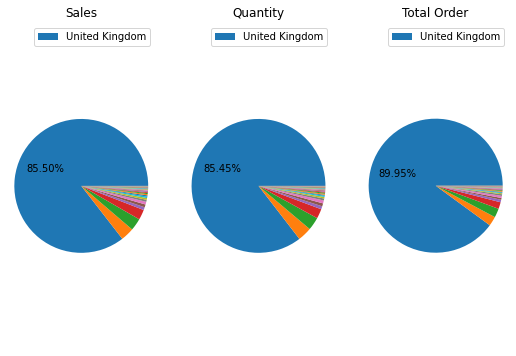

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 80 else ''

p,t,a = ax1.pie(Sales_Country.Sales, autopct=autopct)
p,t,a = ax2.pie(Sales_Country.Quantity, autopct=autopct)
p,t,a = ax3.pie(Sales_Country.Total_Order, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Sales_Country.Sales/Sales_Country.Sales.sum()*100
normsizes2 = Sales_Country.Quantity/Sales_Country.Quantity.sum()*100
normsizes3 = Sales_Country.Total_Order/Sales_Country.Total_Order.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes.values) if i > 80])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes2.values) if i > 80])
h,k = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes3.values) if i > 80])
ax1.set_title('Sales')
ax2.set_title('Quantity')
ax3.set_title('Total Order')
ax1.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(h, k,loc="best", bbox_to_anchor=(1,1))
plt.show()

From the previous chart, we know. Most of transactions with the percentage 0f 80% more (Total Order, Sales, and Quantity) are coming from the United Kingdom (UK) or domestic transaction. Now let's explore, where is the best foreign transaction for online retail.

In [20]:
Foreign_Sales = Sales_Country.reset_index().query('Country != "United Kingdom"')
Foreign_Sales.head(10)

,Country,Total_Order,Sales,Quantity
1,Germany,6934,126673.74,78420
2,France,6535,115502.90,72293
3,EIRE,4920,95928.40,53805
4,Spain,1849,27338.06,16945
5,Switzerland,1313,26943.79,16635
6,Belgium,1527,25941.26,16325
7,Portugal,1176,18982.35,11214
8,Norway,717,16711.56,8772
9,Netherlands,576,13980.84,6703
10,Australia,467,11709.71,4876


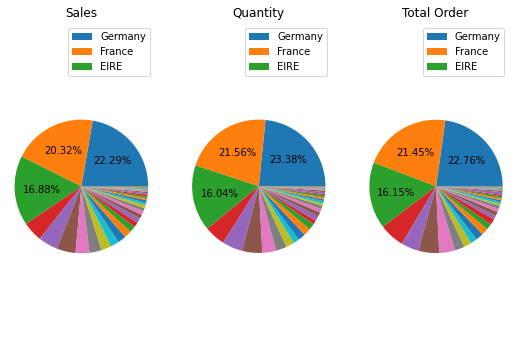

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 15 else ''

p,t,a = ax1.pie(Foreign_Sales.Sales, autopct=autopct)
p,t,a = ax2.pie(Foreign_Sales.Quantity, autopct=autopct)
p,t,a = ax3.pie(Foreign_Sales.Total_Order, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Foreign_Sales.Sales/Foreign_Sales.Sales.sum()*100
normsizes2 = Foreign_Sales.Quantity/Foreign_Sales.Quantity.sum()*100
normsizes3 = Foreign_Sales.Total_Order/Foreign_Sales.Total_Order.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes.values) if i > 15])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes2.values) if i > 15])
h,k = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes3.values) if i > 15])
ax1.set_title('Sales')
ax2.set_title('Quantity')
ax3.set_title('Total Order')
ax1.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(h, k,loc="best", bbox_to_anchor=(1,1))
plt.show()

Finally we can see, the Top 3 of foreign transactions. They are, Germany, France and Ireland.

# **Sales MoM**
Next, let's explore the growth of sales and quantity of product month to month (MOM)

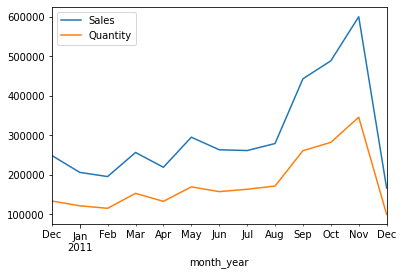

In [22]:
Sales_MoM = pd.DataFrame(new_df.groupby(['month_year']).agg({'Sales':'sum', 'Quantity':'sum'})).reset_index()
Sales_MoM.plot(x='month_year');

From the previous chart, we can conclude, the growth seems to have occurred since August and reached its highest point in November 2011.

# **Top Sales by Product**

In [23]:
Sales_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Sales', ascending=False)[0:10]
Quantity_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Quantity', ascending=False)[0:10]
print(Sales_Product)
print(Quantity_Product)

                                  Total_Order     Sales
Description                                            
PARTY BUNTING                            1268  34952.85
SPOTTY BUNTING                            972  23379.40
ASSORTED COLOUR BIRD ORNAMENT            1144  22848.80
JAM MAKING SET WITH JARS                  824  21137.25
HOT WATER BOTTLE KEEP CALM                723  20617.35
SET OF 3 CAKE TINS PANTRY DESIGN         1113  20583.97
CHILLI LIGHTS                             443  18379.80
CHOCOLATE HOT WATER BOTTLE                684  18308.10
RETROSPOT TEA SET CERAMIC 11 PC           806  17941.60
NATURAL SLATE HEART CHALKBOARD            936  17750.77
                                    Total_Order  Quantity
Description                                              
PACK OF 72 RETROSPOT CAKE CASES             945     14986
ASSORTED COLOUR BIRD ORNAMENT              1144     13520
LUNCH BAG RED RETROSPOT                    1195      9776
JAM MAKING SET PRINTED                

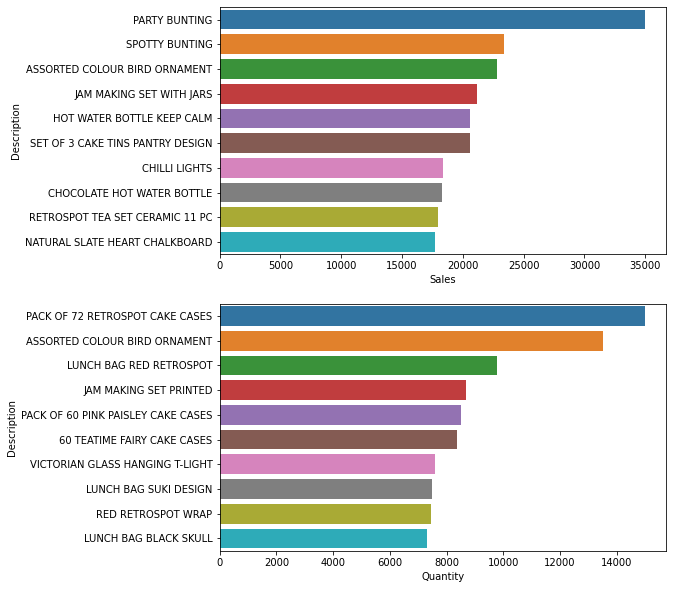

In [24]:
fig, axes = plt.subplots(2,figsize=(8, 10))
sns.barplot(x='Sales', y=Sales_Product.index, data = Sales_Product,
            label="Sales", ax=axes[0])
sns.barplot(x='Quantity', y=Quantity_Product.index, data=Quantity_Product,
            label="Quantity", ax=axes[1])
plt.show()

This is very interesting. There is some difference in Top 10 Sales and Top 10 Quantity of products transactions. It means the higher quantity of sales does not guarantee te higher sales earned. We can draw what is the Top 10 quantity that also generated the highest income sales.

In [25]:
Quantity_Sales = Quantity_Product.merge(Sales_Product, left_index=True, right_index=True, how='inner')
Quantity_Sales

,Total_Order_x,Quantity,Total_Order_y,Sales
Description,,,,
ASSORTED COLOUR BIRD ORNAMENT,1144,13520,1144,22848.8


wow, There is only one product that have the highest quantity and sales that is ASSORTED COLOUR BIRD ORNAMENT.

# **Highest and Lowest Month of Sales**
We already know, if November is the highest peak of transactions. But let's make it clear by exploring what is the month that generated the highest and the lowest sales and quantity.

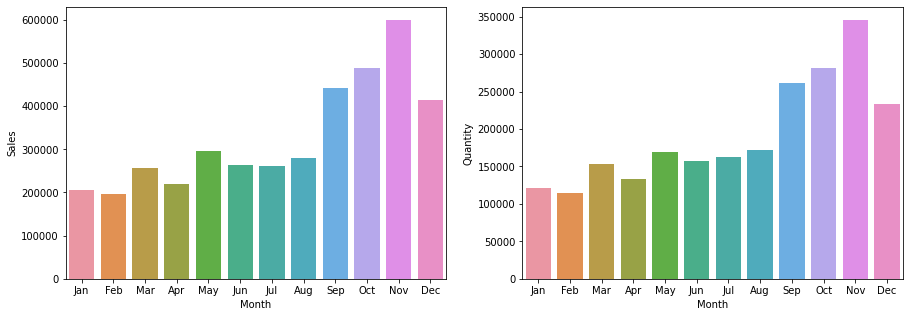

In [26]:
Monthly_Sales = new_df.groupby(['Month']).agg({'Sales':'sum', 'Quantity':'sum'})
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_Sales = Monthly_Sales.reindex(months_ordered)
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Monthly_Sales.index, y='Sales', data = Monthly_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Monthly_Sales.index, y='Quantity', data = Monthly_Sales,
            label="Quantity", ax=axes[1])
plt.show()

# **Highest Sales of Day**
How about the day? Instead using of sum(), we will explore the highest average of sales and quantitu by day of the weekend. For note, There is no transactions during Saturday.

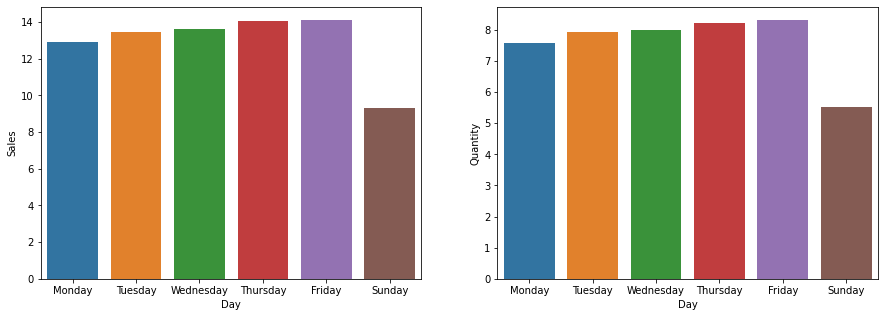

In [27]:
Day_Sales = new_df.groupby(['Day']).agg({'Sales':'mean', 'Quantity':'mean'})
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
Day_Sales = Day_Sales.reindex(day_ordered)
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Day_Sales.index, y='Sales', data = Day_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Day_Sales.index, y='Quantity', data = Day_Sales,
            label="Quantity", ax=axes[1])
plt.show()

It's quitely close. But we know, Friday is the best day for shopping and Sunday is the 'worst' day for shopping.

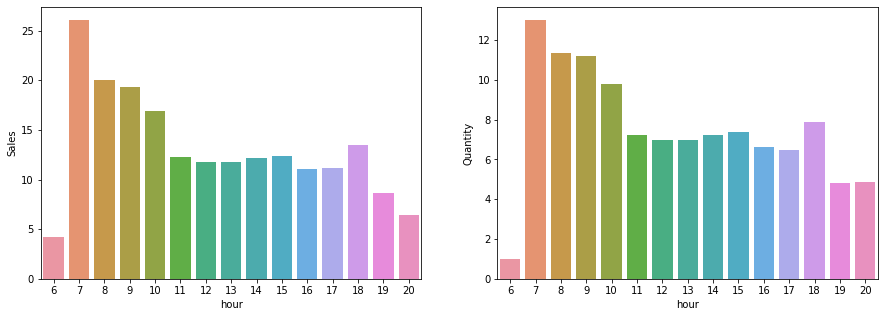

In [28]:
Hour_Sales = new_df.groupby(['hour']).agg({'Sales':'mean', 'Quantity':'mean'})
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Hour_Sales.index, y='Sales', data = Hour_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Hour_Sales.index, y='Quantity', data = Hour_Sales,
            label="Quantity", ax=axes[1])
plt.show()

The answer is morning. Most of transactions happen during morning Especially at 7 a.m, and 8- 10 a.m respectively.